In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from netCDF4 import Dataset
ds = Dataset("NVDI-2015.nc", "r")
# Checking metadata
print(ds)



<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Normalized Difference Vegetation Index parameters derived from S-NPP CMG data for day 2015/001
    institution: NASA/GSFC/SED/ESD/HBSL/TIS/MODIS-LAND > MODIS Land Science Team, Terrestrial Information Systems,  Hydrospheric and Biospheric Science Laboratory, Earth Sciences Division, Science and Exploration Directorate, Goddard Space Flight Center, NASA
    Conventions: CF-1.6, ACDD-1.3
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    naming_authority: gov.noaa.ncei
    license: See the Use Agreement for this CDR available from the NOAA CDR webpage
    cdm_data_type: Grid
    time_coverage_start: 2015-01-01T00:00:00Z
    time_coverage_end: 2015-01-01T23:59:59Z
    product_version: v2r0
    platform: Suomi-NPP > Suomi National Polar-orbiting Partnership
    sensor: VIIRS > Visible Infrared Imaging Radiometer Suite
    keywords_vocabulary: NASA Global Change Master Directory

In [58]:
print(ds.variables.keys())

# Checking column names

dict_keys(['latitude', 'longitude', 'time', 'crs', 'lat_bnds', 'lon_bnds', 'NDVI', 'TIMEOFDAY', 'QA'])


In [59]:
nvdi = ds.variables['NDVI']
print(nvdi[:5])

[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-0.030500000000000003 -0.030500000000000003 -0.030500000000000003 ...
   -0.030500000000000003 -0.030500000000000003 -0.030500000000000003]
  [-0.030500000000000003 -0.030500000000000003 -0.030500000000000003 ...
   -0.0307 -0.0307 -0.0307]
  [-0.028900000000000002 -0.028900000000000002 -0.028900000000000002 ...
   -0.028 -0.028 -0.028]]]


In [60]:
import xarray as xr

ds = xr.open_dataset('NVDI-2015.nc')

print('Variables:', list(ds.data_vars))


Variables: ['crs', 'lat_bnds', 'lon_bnds', 'NDVI', 'TIMEOFDAY', 'QA']


In [61]:
print('Dimentions:', ds.dims)

Dimentions: FrozenMappingWarningOnValuesAccess({'ncrs': 1, 'latitude': 3600, 'nv': 2, 'longitude': 7200, 'time': 1})


In [62]:
var = ds["NDVI"]
print(var)

<xarray.DataArray 'NDVI' (time: 1, latitude: 3600, longitude: 7200)> Size: 207MB
[25920000 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 14kB 89.97 89.93 89.88 ... -89.93 -89.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 8B 2015-01-01
Attributes:
    long_name:      NOAA Climate Data Record of Normalized Difference Vegetat...
    units:          1
    valid_range:    [-1000 10000]
    grid_mapping:   crs
    standard_name:  normalized_difference_vegetation_index


In [63]:
print(var.values[:10])

[[[    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  ...
  [-0.0305 -0.0305 -0.0305 ... -0.0305 -0.0305 -0.0305]
  [-0.0305 -0.0305 -0.0305 ... -0.0307 -0.0307 -0.0307]
  [-0.0289 -0.0289 -0.0289 ... -0.028  -0.028  -0.028 ]]]


In [64]:
print(nvdi.shape)

(1, 3600, 7200)


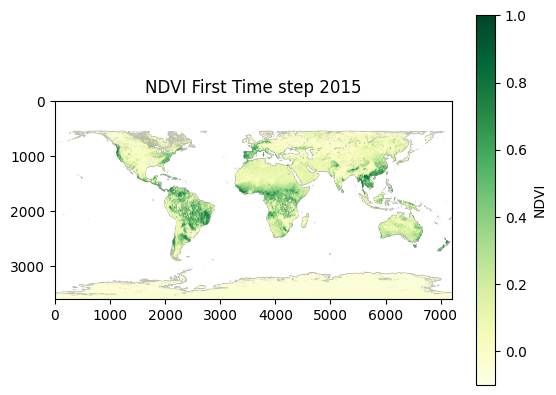

In [35]:
plt.imshow(nvdi[0, :, :], cmap='YlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI First Time step 2015')
plt.show()

In [36]:
time = ds.variables['time']  # usually stores dates or time indices
print(time[:])



[12418.]


In [37]:
time = ds.variables['time']
print(time.units)

days since 1981-01-01 00:00:00


In [38]:
from netCDF4 import num2date

time_var = ds.variables['time']
dates = num2date(time_var[:], units=time_var.units)
print(dates)

[cftime.DatetimeGregorian(2015, 1, 1, 0, 0, 0, 0, has_year_zero=False)]


In [40]:
lat = ds.variables['lat_bnds'][:]
lon = ds.variables['lon_bnds'][:]

print(lat.min(), lat.max())  # min/max latitude
print(lon.min(), lon.max())  # min/max longitude

-89.99999 90.0
-180.0 180.0


In [42]:
ndvi = ds.variables['NDVI']  # replace with actual variable name

# If NDVI is 3D (time, lat, lon), select first timestep
ndvi_malawi = ndvi[0, lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]

lat_malawi = lat[lat_idx.min():lat_idx.max()+1]
lon_malawi = lon[lon_idx.min():lon_idx.max()+1]

print(ndvi_malawi.shape)

(161, 81)


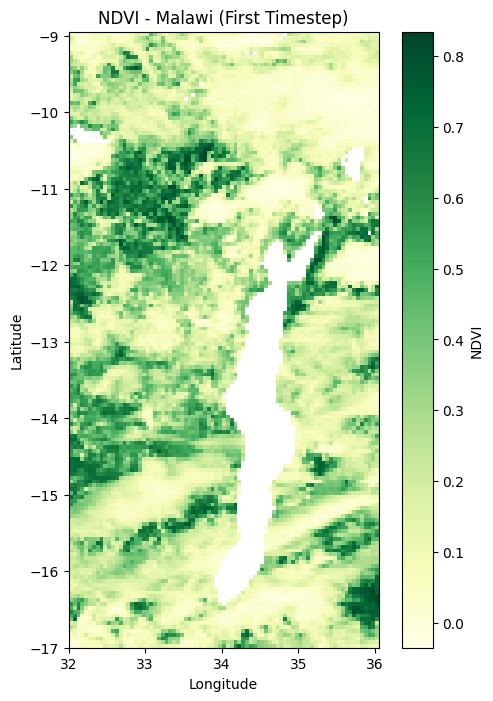

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
plt.imshow(ndvi_malawi, 
           extent=[lon_malawi.min(), lon_malawi.max(), lat_malawi.min(), lat_malawi.max()],
           origin='lower', cmap='YlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI - Malawi (First Timestep)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
malawi_lat_min, malawi_lat_max = -17, -9
malawi_lon_min, malawi_lon_max = 32, 36


In [71]:
import geopandas as gpd

malawi = gpd.read_file("mwi_admbndp_admALL_nso_hotosm_itos_20230405.shp")

print(malawi.total_bounds)


[ 32.75739497 -17.0814482   35.81284805  -9.5239927 ]


In [74]:
ndvi = ds['NDVI'].isel(time = 0)
lat = ds['lat_bnds']
lon = ds['lon_bnds']

# Malawi bounds
min_lon, min_lat, max_lon, max_lat = malawi.total_bounds

# Subset NDVI
ndvi_malawi = ndvi.sel(latitude=slice(min_lat, max_lat),
                       longitude=slice(min_lon, max_lon))


for geom in malawi.geometry:
    if geom.type == 'Polygon':
        x, y = geom.exterior.xy
        plt.plot(x, y, color='red', linewidth=1)
    elif geom.type == 'MultiPolygon':
        for part in geom:
            x, y = part.exterior.xy
            plt.plot(x, y, color='red', linewidth=1)

/tmp/ipykernel_8782/801712106.py:14: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == 'Polygon':
/tmp/ipykernel_8782/801712106.py:17: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geom.type == 'MultiPolygon':
